## Лабораторная работа №5

**Петров Кирилл**

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 14})

### Задача №1

#### Постановка:
Рассмотрим математическую модель логиcтического отображения:
$$
x_{n+1} = r\cdot x_n(1-x_n)
$$

Где $r > 0$, $𝑥_𝑛$ – от нуля до единицы. Так как система дискретная, устойчивость можно определить при нахождении неподвижных точек. Количество неподвижных точек данной системы напрямую зависит от значения параметра $r$. При $3 < r < 3.45$ появляется цикл периода два, что говорит о появлении циклов большей периодичностью с увеличением параметра $r$. Последовательность из значений параметра $𝑟_{2^𝑘}$ стремится к некоторому значению $r_{\infty}$ после которого устойчивость имеет шумоподобный характер.

#### Задание:
1. Построить биффуркационную диаграмму и убедиться в возникновении хаоса
2. Оценить значения параметров, при которых возникают циклы периода один, два, четыре, восемь ($r_1$, $r_2$, $r_3$, $r_4$)
3. Визуально определить значение $r_{\infty}$, после которого начается хаотичное движение
4. Определить интервал третьего окна переодичности

Для определения устойчивости непериодичной траектории использовать численный показатель Ляпунова:

$$
\lambda (r)= \lim_{n\to\infty} \frac{1}{n} \sum_{i=1}^{n-1}log\Big |\frac{df_r}{dx}\Big ({x_i}^{(r)} \Big) \Big |
$$

Если $L>0$, то устанавливается режим динамического хаоса, т.е. траектория неустойчивая. Если $L<0$, то есть устойчивый цикл конечного периода.

#### Решение:

Решение логиcтического отображения:
$$
r\cdot x_n(1-x_n)
$$

In [2]:
def logistic(r, x):
    return r*x*(1 - x)

Построим бифуркационную диаграмму. Для этого для каждого значение параметра $r$ проитерируем процесс с начального условия $x_0=10^{-5}$ до $x_n$, где $n = 10^5$. За это время траектория сойдется к своим предельным значениям.

In [3]:
n = 10000
n_iteration = 1000
x0 = 1e-5*np.ones(n)

In [4]:
def bifurcation_diagram(a, b, n, n_iteration, x):
    r = np.linspace(a, b, n)
    last = 100
    lyapunov = np.zeros(n)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)


    for i in range(n_iteration):
        x = logistic(r, x)

        lyapunov += np.log(abs(r - 2 * r * x))

        if i >= n_iteration - last:
            ax1.plot(r, x, ',k', alpha=0.25)

    lyapunov = lyapunov / n_iteration

    ax1.set_xlim(a, b)
    ax1.set_ylabel(r'$x^*$')
    ax1.set_title(r'Bifurcation diagram on $({}, {})$'.format(a, b))

    ax2.plot(r[lyapunov < 0], lyapunov[lyapunov < 0], '.k', alpha=0.5, ms=0.5)
    ax2.plot(r[lyapunov >= 0], lyapunov[lyapunov >= 0], '.r', alpha=0.5, ms=0.5)
    ax2.set_xlim(a, b)
    ax2.set_ylim(-2, 1)
    ax2.axhline(0, color='k', lw=0.5, alpha=0.5)
    ax2.set_xlabel(r'$r$')
    ax2.set_ylabel(r'$\lambda (r)$')
    ax2.set_title(r'Lyapunov exponent on $({}, {})$'.format(a, b))

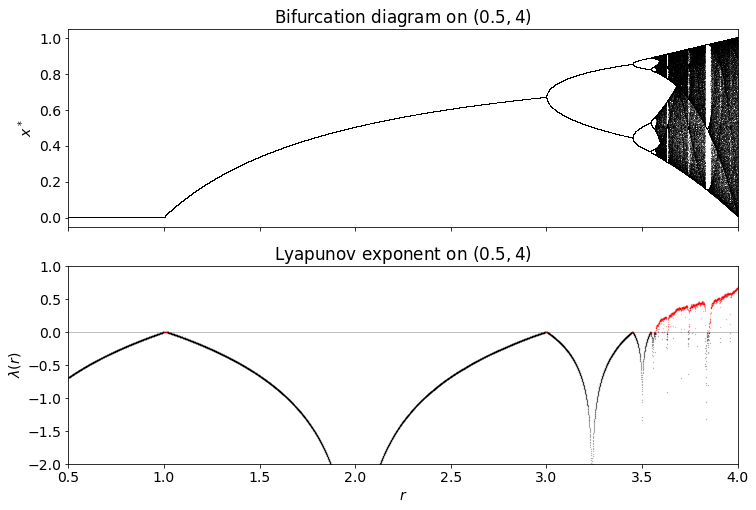

In [5]:
bifurcation_diagram(0.5, 4, n, n_iteration, x0)

Видно, что существует область динамического хаоса, после некоторого параметра $r_{\infty}$. Определим интересующие нас значения $r$. По графику можно примерно прикинуть в каких значениях возникают циклы. $r_1 = 3$, $r_2 \in (3; 3.45)$

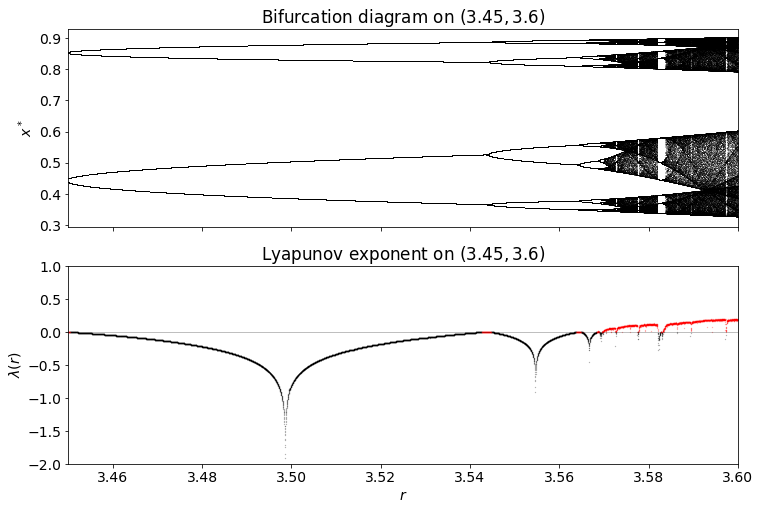

In [6]:
bifurcation_diagram(3.45, 3.6, n, n_iteration, x0)

$r_4 \in (3.45; 3.54)$; $r_8 \in (3.54, 3.56)$. При переходе через $r_{\infty} \approx 3.57$ ляпуновский показзатель начинает менять знак и начинается хаос.

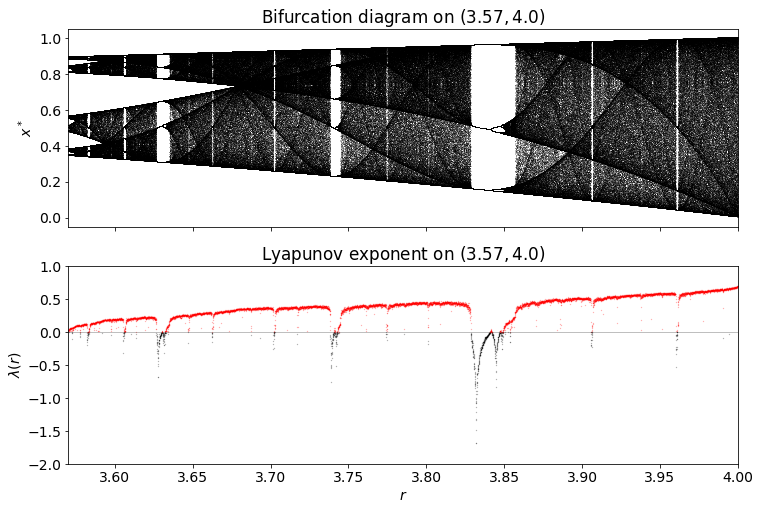

In [7]:
bifurcation_diagram(3.57, 4.0, n, n_iteration, x0)

На этом участке можно заметить окна переодичности. Во всек окнах ляпунова показатель меньше нуля, движения в этих интервалах устойчивое. В интервале $(3.828; 3.841)$ есть цикл с периодом 3.

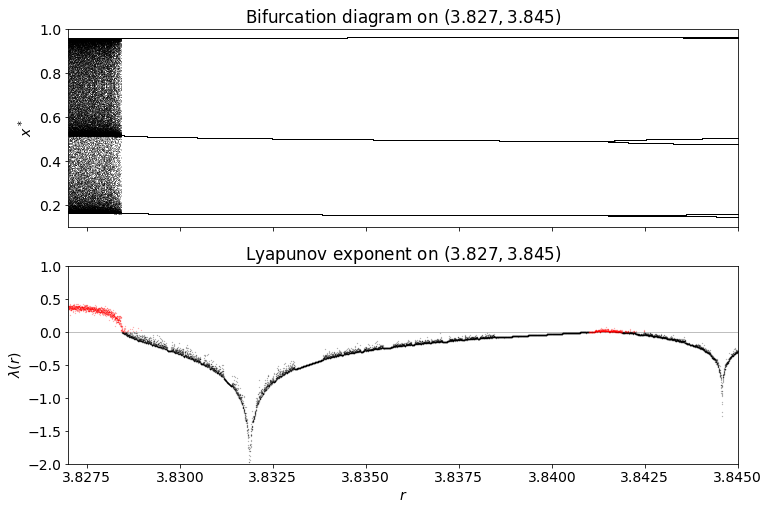

In [8]:
bifurcation_diagram(3.827, 3.845, n, n_iteration, x0)